### 68. HOG (Step.3) ヒストグラム正規化

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# get HOG step2
def HOG(img):
    # gray scale
    def BGR2GRAY(img):
        gray =  0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
        return gray
    
    # gx, gy
    def get_gradXY(gray):
        H,W = gray.shape
        

        gray = np.pad(gray, (1,1), 'edge')

        gx = gray[1:1+H, 2:] - gray[1:1+H, :W]
        gy = gray[2:, 1:1+W] - gray[:H, 1:1+W]
        gx[gx==0] = 1e-6
        
        return gx, gy
    
    
    
    
    # magunitude and angle
    def get_MagGrad(gx, gy):
        magunitude = np.sqrt(gx**2+gy**2)
        gradient = np.arctan(gy/gx)
        
        #gradient[gradient < 0] = np.pi/2 + gradient[gradient<0] +np.pi/2
        gradient[gradient < 0] = np.pi + gradient[gradient<0]
        
        return magunitude, gradient
    
    # quantization
    def quantization(gradient):
        # prepare quantization table
        gradient_quantized = np.zeros_like(gradient, dtype=np.int)
        
        # quantization base
        d = np.pi/9
        
        # quantization
        for i in range(9):
            gradient_quantized[np.where((gradient>=d*i)&(gradient<=d*(i+1)))] = i
            # これは両端気にしなくていいのか？
            
        return gradient_quantized
    
    # get gradient histogram
    def gradient_histogram(gradient_quantized, magunitude, N=8):
        # get shape
        H,W = magunitude.shape
        
        # get cell num
        cell_N_H = H//N
        cell_N_W = W//N
        histogram = np.zeros((cell_N_H, cell_N_W,9), dtype=np.float32)
        
        # each pixel
        for y in range(cell_N_H):
            for x in range(cell_N_W):
                for j in range(N):
                    for i in range(N):
                        # ？？？
                        histogram[y, x, gradient_quantized[y*8+j, x*8+i]] += magunitude[y*8+j, x*8+i]
        
        return histogram
    
    
    # histgram normalization
    def normalization(histogram, C=3, epsilon=1):
        cell_N_H, cell_N_W, _ = histogram.shape  # 32, 32, 9
        
        _C = C//2
        # each histogram
        for y in range(cell_N_H):
            for x in range(cell_N_W):
                histogram[y,x] /= np.sqrt(np.sum(histogram[max(y-1, 0):min(y+2, cell_N_H), \
                                                          max(x-1, 0):min(x+2, cell_N_W)]**2) +epsilon)
                
        return histogram
        
        
    
    gray = BGR2GRAY(img)
    gx, gy = get_gradXY(gray)
    magunitude, gradient = get_MagGrad(gx, gy)
    gradient_quantized = quantization(gradient)
    histogram = gradient_histogram(gradient_quantized, magunitude)
    
    print(type(histogram))
    histogram = normalization(histogram)
    
    return histogram


<class 'numpy.ndarray'>


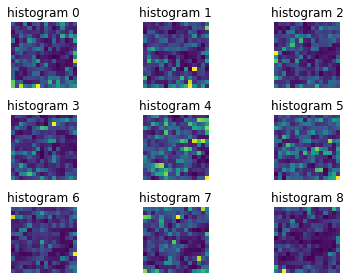

In [16]:
img = cv2.imread('../imori.jpg').astype(np.float32)
histogram = HOG(img)


# write histogram to file
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(histogram[...,i])
    plt.title(f'histogram {i}')
    plt.axis('off')
    plt.xticks(color="None")
    plt.yticks(color="None")
plt.tight_layout()    
plt.savefig('out68.png')
plt.show()